In [14]:
import gala.potential as gp
import astropy.units as u
import numpy as np
import gala.dynamics as gd

In [15]:
mw = gp.MilkyWayPotential()
NFWpot = mw['halo']

In [16]:
test_star_x = [10,0,0]*u.kpc
test_star_dx = [0, 175, 9]* u.km/u.s

In [23]:
ics = gd.PhaseSpacePosition(pos=test_star_x,
                            vel=test_star_dx)

orbit = gp.Hamiltonian(NFWpot).integrate_orbit(ics, dt=1*u.Myr, t1=0*u.Myr, t2=10*u.Gyr)
norbits = 128
new_pos = np.random.normal(ics.pos.xyz.to(u.pc).value, 100.,
                           size=(norbits,3)).T * u.pc
new_vel = np.random.normal(ics.vel.d_xyz.to(u.km/u.s).value, 1.,
                           size=(norbits,3)).T * u.km/u.s
new_ics = gd.PhaseSpacePosition(pos=new_pos, vel=new_vel)
orbits = gp.Hamiltonian(NFWpot).integrate_orbit(new_ics, dt=1*u.Myr, t1=0*u.Myr, t2=10*u.Gyr)


(<Figure size 600x600 with 1 Axes>,
 <Axes3D: xlabel='$x$ [$\\mathrm{kpc}$]', ylabel='$y$ [$\\mathrm{kpc}$]', zlabel='$z$ [$\\mathrm{kpc}$]'>)

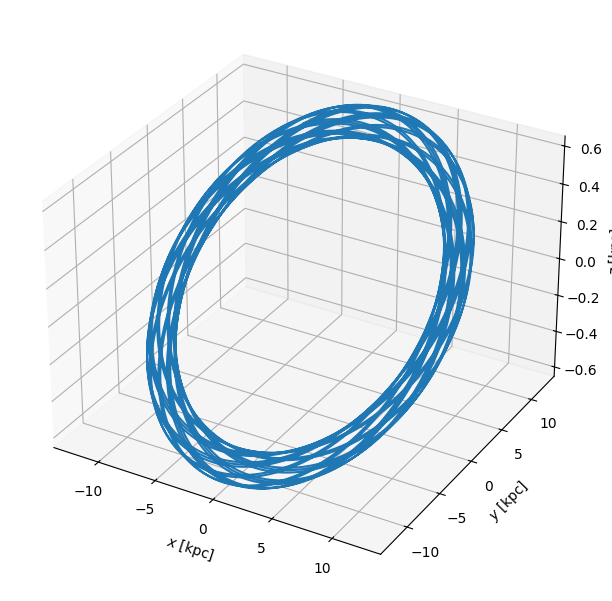

In [24]:
orbit.plot_3d(['x','y','z'])

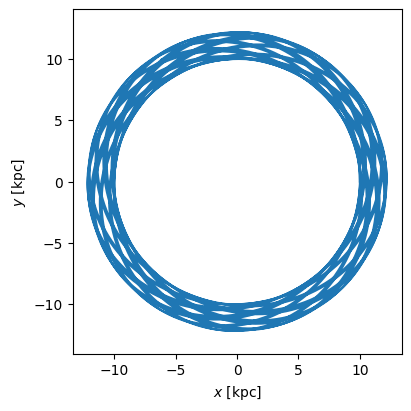

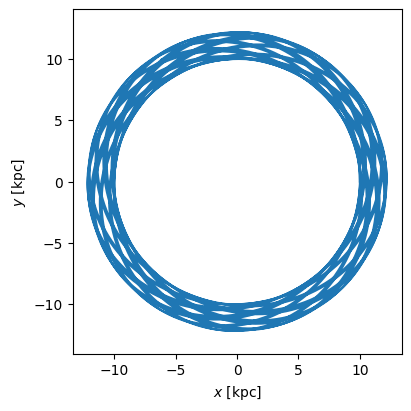

In [22]:
orbit.plot(['x','y'])